In [1]:
# CNN flows 
# 1. Convolutional Layer
# 2. Activation Function
# 3. Pooling Layer
# 4. Fully Connected Layer

# for convolutional layer we will use gaussian filter only
# for activation function we will use ReLU
# for pooling layer we will use max pooling
# for fully connected layer we will use softmax (MNIST dataset)

In [4]:
import numpy as np
import cv2

In [8]:
# For Convolution and Max Pooling Functions
def convolve2d(image, kernel, stride=(1, 1), padding=0):
    image_np = np.array(image)
    image_padded = cv2.copyMakeBorder(image_np, padding, padding, padding, padding, cv2.BORDER_CONSTANT, value=0)
    
    output = cv2.filter2D(image_padded, -1, kernel, delta=0, borderType=cv2.BORDER_CONSTANT)
    output = np.maximum(output, 0)
    output = output[::stride[0], ::stride[1]]
    return output

def max_pooling(input_data, pool_size=(2, 2), stride=(2, 2)):
    input_height, input_width, input_channels = input_data.shape
    pool_height, pool_width = pool_size
    stride_height, stride_width = stride

    output_height = (input_height - pool_height) // stride_height + 1
    output_width = (input_width - pool_width) // stride_width + 1

    pooled_output = np.zeros((output_height, output_width, input_channels))

    for h in range(output_height):
        for w in range(output_width):
            h_start = h * stride_height
            h_end = h_start + pool_height
            w_start = w * stride_width
            w_end = w_start + pool_width
            for c in range(input_channels):
                patch = input_data[h_start:h_end, w_start:w_end, c]
                pooled_output[h, w, c] = np.max(patch)
    return pooled_output

In [32]:
# For Fully Connected Layer (Neural Network) Functions
# Neural Network 1 Hidden Layer
class NeuralNetwork:
    def __init__(self, input, hidden, output):
        self.input = input
        self.hidden = hidden
        self.output = output
        
        self.weights1 = np.random.rand(self.input, self.hidden)
        self.weights2 = np.random.rand(self.hidden, self.output)
        self.bias1 = np.random.rand(1, self.hidden)
        self.bias2 = np.random.rand(1, self.output)
        
    def feedforward(self, X):
        self.z1 = np.dot(X, self.weights1) + self.bias1
        self.a1 = self.relu(self.z1)
        self.z2 = np.dot(self.a1, self.weights2) + self.bias2
        self.a2 = self.softmax(self.z2)
        return self.a2
    
    def relu(self, x):
        return np.maximum(0, x)
    
    def relu_derivative(self, x):
        return 1. * (x > 0)
    
    def softmax(self, x):
        exps = np.exp(x - x.max())
        return exps / np.sum(exps, axis=1, keepdims=True)
    
    def backpropagation(self, X, y, learning_rate):
        m = X.shape[0]
        
        dz2 = self.a2 - y
        dw2 = np.dot(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m
        
        dz1 = np.dot(dz2, self.weights2.T) * self.relu_derivative(self.z1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        self.weights1 = self.weights1 - learning_rate * dw1
        self.bias1 = self.bias1 - learning_rate * db1
        self.weights2 = self.weights2 - learning_rate * dw2
        self.bias2 = self.bias2 - learning_rate * db2
        
    def train(self, X, y, learning_rate):
        self.feedforward(X)
        self.backpropagation(X, y, learning_rate)
            
    def predict(self, X):
        return self.feedforward(X)

In [33]:
# import MNIST dataset
from keras.datasets import mnist
from keras.utils import np_utils

(X_train, y_train), (X_test, y_test) = mnist.load_data()

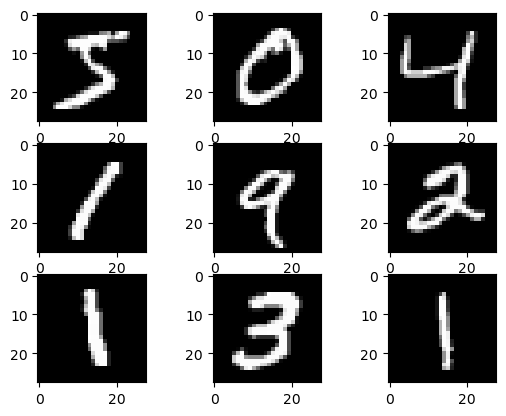

In [34]:
# plot the first 9 images
import matplotlib.pyplot as plt
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))

In [35]:
# Preprocessing
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [36]:
# Convolutional Layer
# Gaussian Filter
gaussian_filter = np.array([[1, 2, 1],
                            [2, 4, 2],
                            [1, 2, 1]]) / 16

In [30]:
# Activation Function
def ReLU(x):
    return np.maximum(0, x)

# Pooling Layer
# Max Pooling
pool_size = (2, 2)
stride = (2, 2)

# Fully Connected Layer
input_layer = 14 * 14
hidden_layer = 128
output_layer = 10

In [ ]:
# Train the model
nn = NeuralNetwork(input_layer, hidden_layer, output_layer)
X_train_flatten = X_train.reshape(X_train.shape[0], -1)
nn.train(X_train_flatten, y_train, 0.01, 1000)